In [20]:
import mglearn

from sklearn.datasets import load_breast_cancer, make_blobs, fetch_lfw_people, load_digits, \
                             make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA, NMF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score, silhouette_score
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

import numpy as np

from scipy.cluster.hierarchy import dendrogram, ward

## Scaling

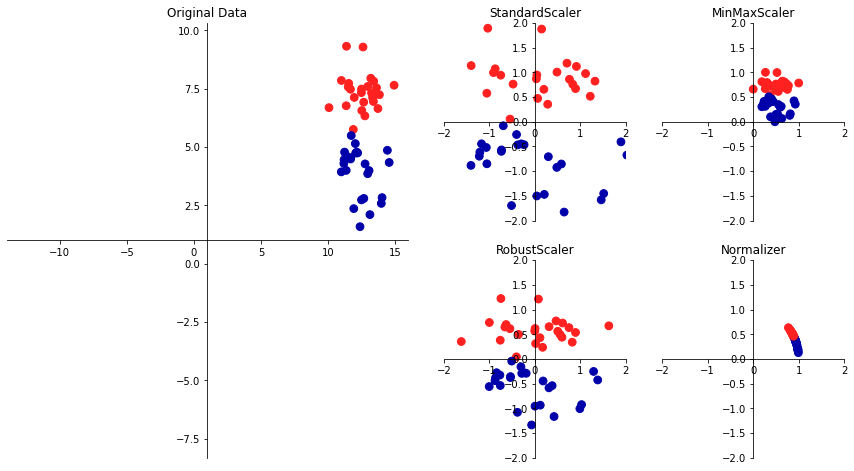

In [2]:
mglearn.plots.plot_scaling()

In [4]:
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=1
)

In [5]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train_scaled = scaler.transform(X_train)

print(f'x train scaled shape: {X_train_scaled.shape}')

print(f'min before scale: {X_train.min(axis=0)}')
print(f'max before scale: {X_train.max(axis=0)}')

print(f'min after scale: {X_train_scaled.min(axis=0)}')
print(f'max after scale: {X_train_scaled.max(axis=0)}')

x train scaled shape: (426, 30)
min before scale: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
max before scale: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
min after scale: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
max after scale: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
X_test_scaled = scaler.transform(X_test)

print(f'min after scale: {X_test_scaled.min(axis=0)}')
print(f'max after scale: {X_test_scaled.max(axis=0)}')

min after scale: [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
max after scale: [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [18]:
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

Text(0.5, 1.0, 'badly scaled data')

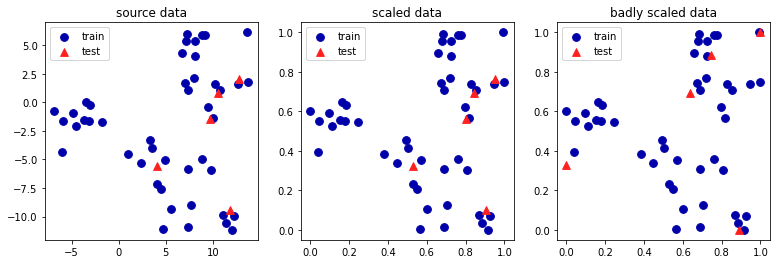

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2([0]), label='train', s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=mglearn.cm2([1]), label='test', s=60, marker='^')

axes[0].legend(loc='upper left')
axes[0].set_title('source data')

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2([0]), label='train', s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=mglearn.cm2([1]), label='test', s=60, marker='^')

axes[1].legend(loc='upper left')
axes[1].set_title('scaled data')

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)

X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2([0]), label='train', s=60)
axes[2].scatter(
    X_test_scaled_badly[:, 0],
    X_test_scaled_badly[:, 1],
    c=mglearn.cm2([1]),
    label='test',
    s=60,
    marker='^'
)

axes[2].legend(loc='upper left')
axes[2].set_title('badly scaled data')

## SVC

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    random_state=0
)

svm = SVC(C=100)
svm.fit(X_train, y_train)

print(f'Train score: {svm.score(X_train, y_train)}')
print(f'Test score: {svm.score(X_test, y_test)}')

Train score: 0.9413145539906104
Test score: 0.9440559440559441


In [33]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(f'Scaled train score: {svm.score(X_train_scaled, y_train)}')

Scaled train score: 1.0


In [35]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print(f'Scaled train score: {svm.score(X_train_scaled, y_train)}')

Scaled train score: 1.0


## PCA

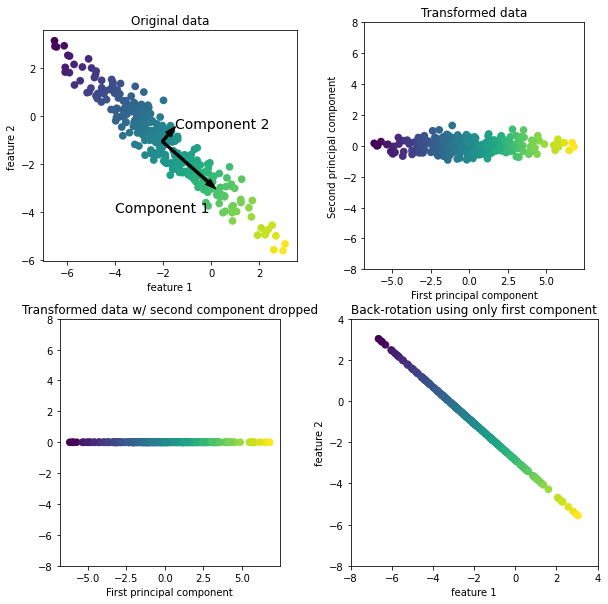

In [37]:
mglearn.plots.plot_pca_illustration()

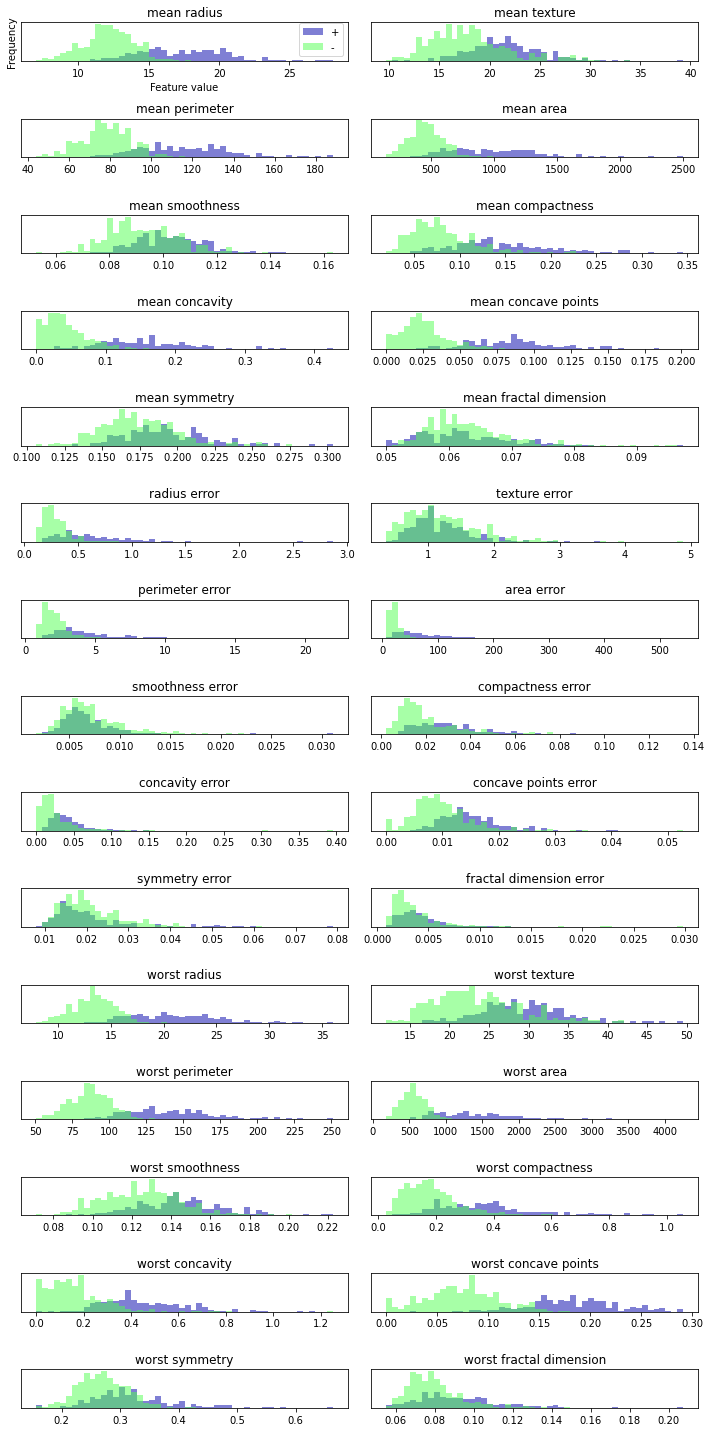

In [40]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))

malignant = cancer.data[cancer.target == 0]
bening = cancer.data[cancer.target == 1]

ax = axes.ravel()

for index in range(30):
    _, bins = np.histogram(cancer.data[:, index], bins=50)

    ax[index].hist(
        malignant[:, index],
        bins=bins,
        color=mglearn.cm3([0]),
        alpha=.5
    )
    ax[index].hist(
        bening[:, index],
        bins=bins,
        color=mglearn.cm3([2]),
        alpha=.5
    )
    
    ax[index].set_title(cancer.feature_names[index])
    ax[index].set_yticks(())
    
    
ax[0].set_xlabel('Feature value')
ax[0].set_ylabel('Frequency')

ax[0].legend(['+', '-'], loc='best')

fig.tight_layout()

In [43]:
scaler = StandardScaler()
scaler.fit(cancer.data)

X_scaled = scaler.transform(cancer.data)

In [47]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print(f'Source shape: {X_scaled.shape}')
print(f'Source shape after size reduce: {X_pca.shape}')

Source shape: (569, 30)
Source shape after size reduce: (569, 2)


Text(0, 0.5, 'second')

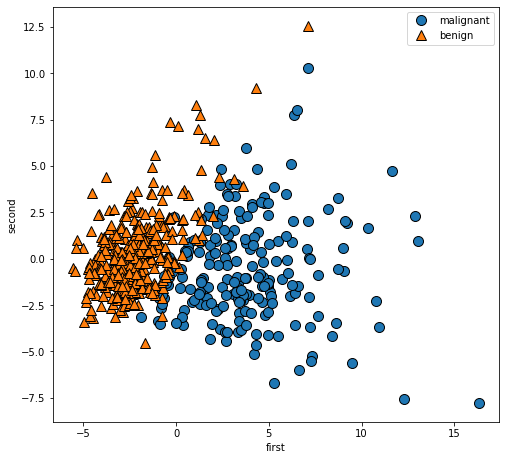

In [48]:
plt.figure(figsize=(8, 8))

mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel(f'first')
plt.ylabel(f'second')

In [52]:
print(f'components shape: {pca.components_.shape}')
print(f'components: {pca.components_}')

components shape: (2, 30)
components: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


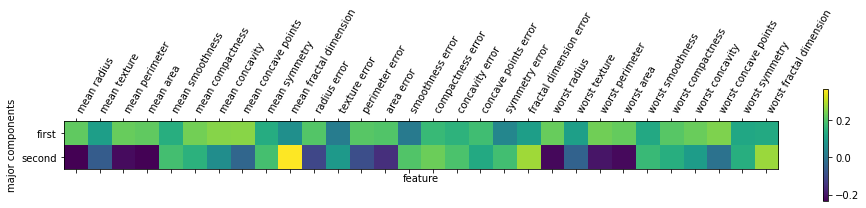

In [55]:
plt.matshow(pca.components_, cmap='viridis')

plt.yticks([0, 1], ['first', 'second'])
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')

plt.xlabel('feature')
plt.ylabel('major components')

plt.colorbar()

In [23]:
people = fetch_lfw_people(
    min_faces_per_person=20,
    resize=.7
)

In [ ]:
image_shape = people.images[0].shape
fix, axes = plt.subplots(
    2, 5,
    figsize=(15, 8),
    subplot_kw={'xticks': (), 'yticks': ()}
)

for target, image, ax, index in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

## People

In [62]:
print(f'shape: {people.images.shape}')
print(f'classes number: {people.target_names}')

shape: (3023, 87, 65)
classes number: ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Sil

In [69]:
counts = np.bincount(people.target)

for index, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f'{name} {count}')

Alejandro Toledo 39
Alvaro Uribe 35
Amelie Mauresmo 21
Andre Agassi 36
Angelina Jolie 20
Ariel Sharon 77
Arnold Schwarzenegger 42
Atal Bihari Vajpayee 24
Bill Clinton 29
Carlos Menem 21
Colin Powell 236
David Beckham 31
Donald Rumsfeld 121
George Robertson 22
George W Bush 530
Gerhard Schroeder 109
Gloria Macapagal Arroyo 44
Gray Davis 26
Guillermo Coria 30
Hamid Karzai 22
Hans Blix 39
Hugo Chavez 71
Igor Ivanov 20
Jack Straw 28
Jacques Chirac 52
Jean Chretien 55
Jennifer Aniston 21
Jennifer Capriati 42
Jennifer Lopez 21
Jeremy Greenstock 24
Jiang Zemin 20
John Ashcroft 53
John Negroponte 31
Jose Maria Aznar 23
Juan Carlos Ferrero 28
Junichiro Koizumi 60
Kofi Annan 32
Laura Bush 41
Lindsay Davenport 22
Lleyton Hewitt 41
Luiz Inacio Lula da Silva 48
Mahmoud Abbas 29
Megawati Sukarnoputri 33
Michael Bloomberg 20
Naomi Watts 22
Nestor Kirchner 37
Paul Bremer 20
Pete Sampras 22
Recep Tayyip Erdogan 30
Ricardo Lagos 27
Roh Moo-hyun 32
Rudolph Giuliani 26
Saddam Hussein 23
Serena Williams 52

In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X_people,
    y_people,
    stratify=y_people,
    random_state=0
)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(f'Test score: {knn.score(X_test, y_test)}')

Test score: 0.23255813953488372


## Whitening

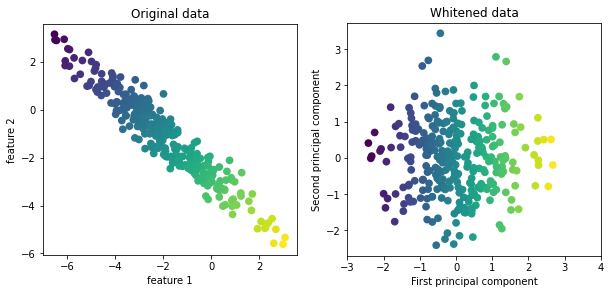

In [73]:
mglearn.plots.plot_pca_whitening()

In [74]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f'train data after pca: {X_train_pca.shape}')

train data after pca: (1547, 100)


In [75]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print(f'test score: {knn.score(X_test_pca, y_test)}')

test score: 0.312015503875969


In [76]:
print(f'pca components shape: {pca.components_.shape}')

pca components shape: (100, 5655)


In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for index, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title(f'{index + 1}. component')

In [ ]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'second major component')

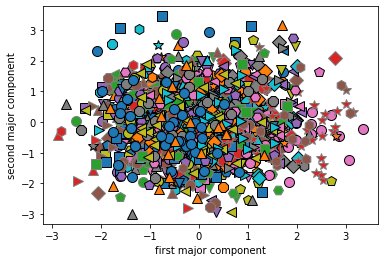

In [77]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('first major component')
plt.ylabel('second major component')

## NMF

/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


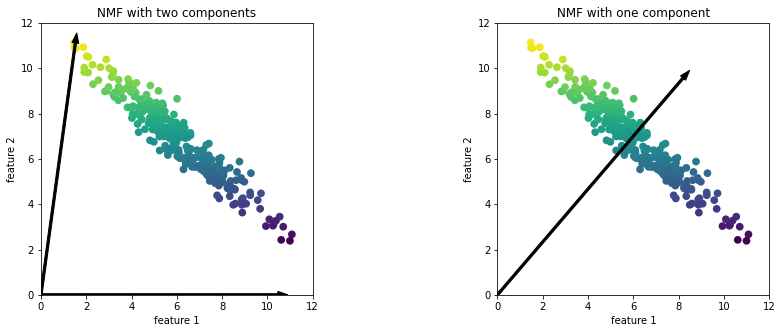

In [80]:
mglearn.plots.plot_nmf_illustration()

In [ ]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

In [ ]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

In [ ]:
compn = 3
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

compn = 7
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

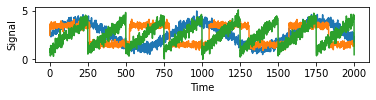

In [83]:
S = mglearn.datasets.make_signals()

plt.figure(figsize=(6, 1))

plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [84]:
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)

print(f'Measure shape: {X.shape}')

Measure shape: (2000, 100)


In [87]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)

print(f'Recycle signal shape: {S_.shape}')

Recycle signal shape: (2000, 3)


/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


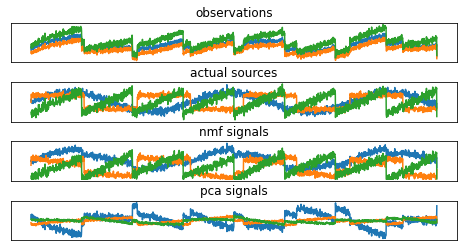

In [89]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X, S, S_, H]
names = ['observations', 'actual sources', 'nmf signals', 'pca signals']

fig, axes = plt.subplots(
    4,
    figsize=(8, 4),
    gridspec_kw={'hspace': .5},
    subplot_kw={'xticks': (), 'yticks': ()}
)

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

## t-SNE

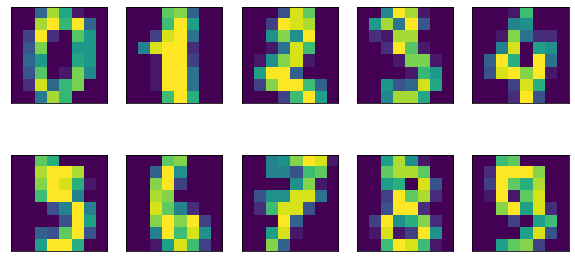

In [92]:
digits = load_digits()

fig, axes = plt.subplots(
    2, 5,
    figsize=(10, 5),
    subplot_kw={'xticks': (), 'yticks': ()}
)

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second major component')

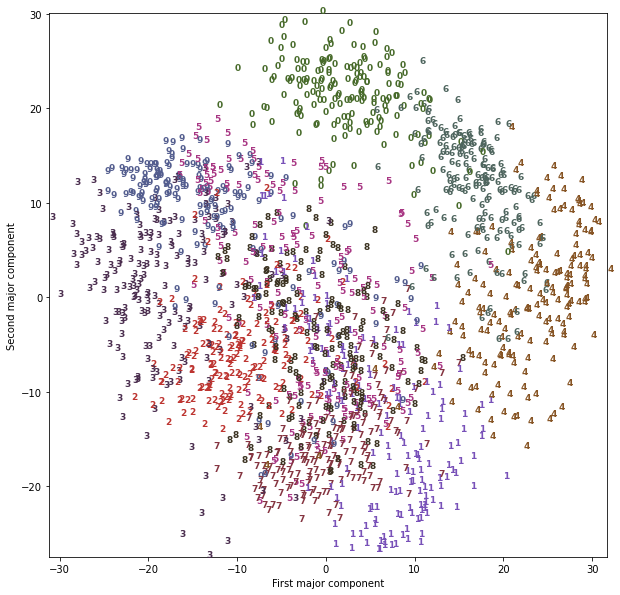

In [93]:
pca = PCA(n_components=2)
pca.fit(digits.data)

digits_pca = pca.transform(digits.data)

colors = [
    "#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
    "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"
]

plt.figure(figsize=(10, 10))

plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for index in range(len(digits.data)):
    plt.text(
        digits_pca[index, 0],
        digits_pca[index, 1],
        str(digits.target[index]),
        color=colors[digits.target[index]],
        fontdict={'weight': 'bold', 'size': 9}
    )

plt.xlabel('First major component')
plt.ylabel('Second major component')

In [95]:
tsne = TSNE(random_state=42)

digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 'Second tsne major component')

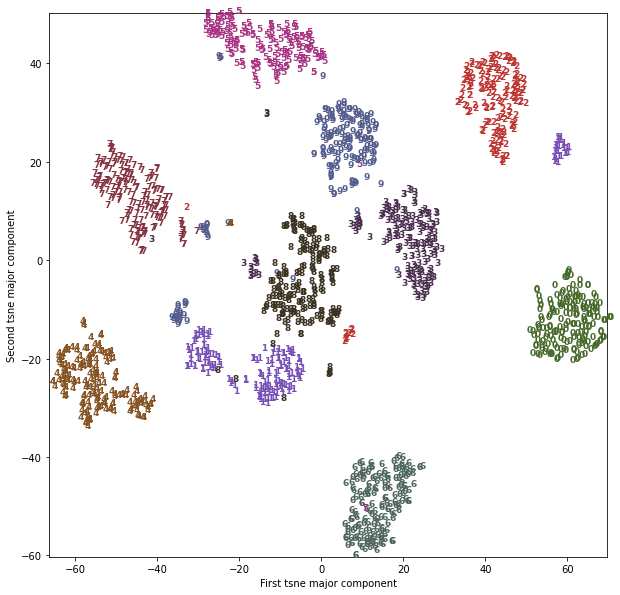

In [96]:
plt.figure(figsize=(10, 10))

plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max())
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max())

for index in range(len(digits.data)):
    plt.text(
        digits_tsne[index, 0],
        digits_tsne[index, 1],
        str(digits.target[index]),
        color=colors[digits.target[index]],
        fontdict={'weight': 'bold', 'size': 9}
    )

plt.xlabel('First tsne major component')
plt.ylabel('Second tsne major component')

## Кластеризация

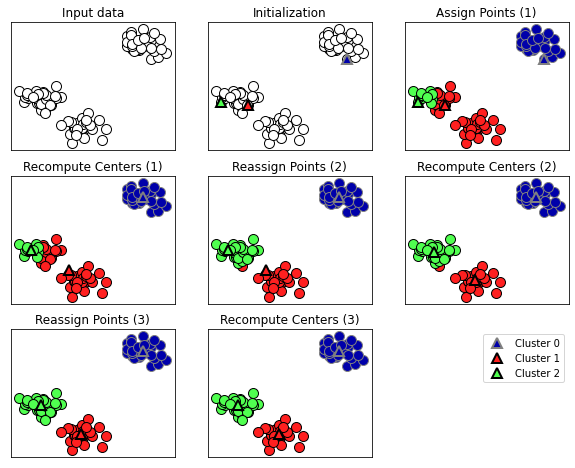

In [97]:
mglearn.plots.plot_kmeans_algorithm()

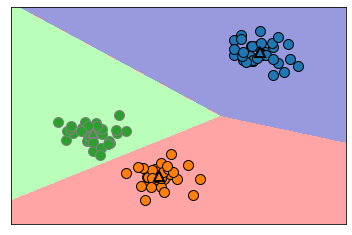

In [98]:
mglearn.plots.plot_kmeans_boundaries()

In [100]:
X, y = make_blobs(random_state=1)

k_means = KMeans(n_clusters=3)
k_means.fit(X)

KMeans(n_clusters=3)

In [101]:
print(f'Clusters affilation: {k_means.labels_}')

Clusters affilation: [0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


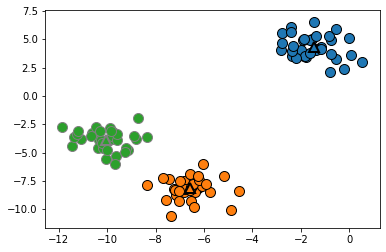

In [105]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], k_means.labels_, markers='o')
mglearn.discrete_scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    range(0, 3),
    markers='^',
    markeredgewidth=2
)

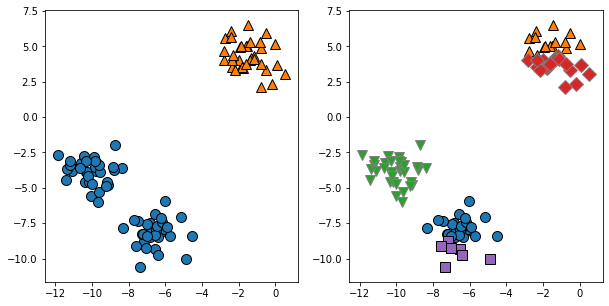

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

k_means = KMeans(n_clusters=2)
k_means.fit(X)

assignments = k_means.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

k_means = KMeans(n_clusters=5)
k_means.fit(X)

assignments = k_means.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])

Text(0, 0.5, 'feature 1')

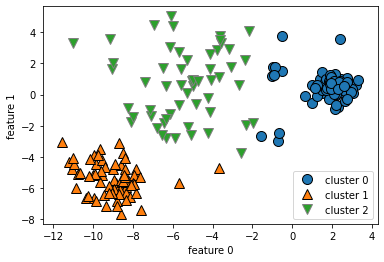

In [107]:
X_varied, y_varied = make_blobs(
    n_samples=200,
    cluster_std=[1.0, 2.5, 0.5],
    random_state=170
)

k_means = KMeans(n_clusters=3, random_state=0)
y_pred = k_means.fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)

plt.legend(['cluster 0', 'cluster 1', 'cluster 2'], loc='best')

plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

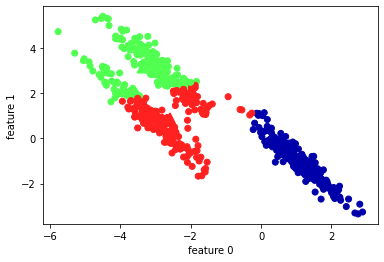

In [109]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

k_means = KMeans(n_clusters=3)
k_means.fit(X)

y_pred = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    marker='^',
    c=range(0, 3),
    s=100,
    linewidths=2,
    cmap=mglearn.cm3
)

plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0, 0.5, 'feature 1')

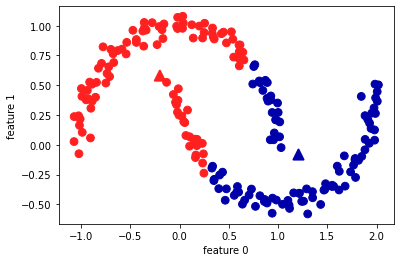

In [112]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

k_means = KMeans(n_clusters=2)
k_means.fit(X)

y_pred = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    marker='^',
    c=[mglearn.cm2(0), mglearn.cm2(1)],
    s=100,
    linewidths=2
)

plt.xlabel('feature 0')
plt.ylabel('feature 1')

In [113]:
X_train, X_test, y_train, y_test = train_test_split( X_people, y_people, stratify=y_people, random_state=0)

nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

/usr/local/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle('extracted components')

for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T,
    kmeans.cluster_centers_,
    pca.components_,
    nmf.components_
):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape))

axes[0, 0].set_ylabel('k-means')
axes[1, 0].set_ylabel('pca')
axes[2, 0].set_ylabel('nmf')

fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(8, 8))
fig.suptitle('reconstructions')

for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T,
    X_test,
    X_reconstructed_kmeans,
    X_reconstructed_pca,
    X_reconstructed_nmf
):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))

axes[0, 0].set_ylabel('source')
axes[1, 0].set_ylabel('k-means')
axes[2, 0].set_ylabel('pca')
axes[3, 0].set_ylabel('nmf')

classes affiliation: [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


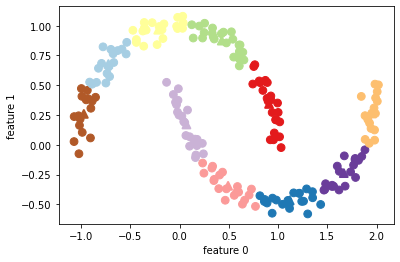

In [116]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

k_means = KMeans(n_clusters=10, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(
    k_means.cluster_centers_[:, 0],
    k_means.cluster_centers_[:, 1],
    s=60,
    marker='^',
    c=range(k_means.n_clusters),
    linewidth=2,
    cmap='Paired'
)

plt.xlabel('feature 0')
plt.ylabel('feature 1')
print(f'classes affiliation: {y_pred}')


In [117]:
distances = k_means.transform(X)

print(f'dist-char shape: {distances.shape}')
print(f'dist-char: {distances}')

dist-char shape: (200, 10)
dist-char: [[1.54731274 1.03376805 0.52485524 ... 1.14060718 1.12484411 1.80791793]
 [2.56907679 0.50806038 1.72923085 ... 0.149581   2.27569325 2.66814112]
 [0.80949799 1.35912551 0.7503402  ... 1.76451208 0.71910707 0.95077955]
 ...
 [1.12985081 1.04864197 0.91717872 ... 1.50934512 1.04915948 1.17816482]
 [0.90881164 1.77871545 0.33200664 ... 1.98349977 0.34346911 1.32756232]
 [2.51141196 0.55940949 1.62142259 ... 0.04819401 2.189235   2.63792601]]


## Агломеративная кластеризация

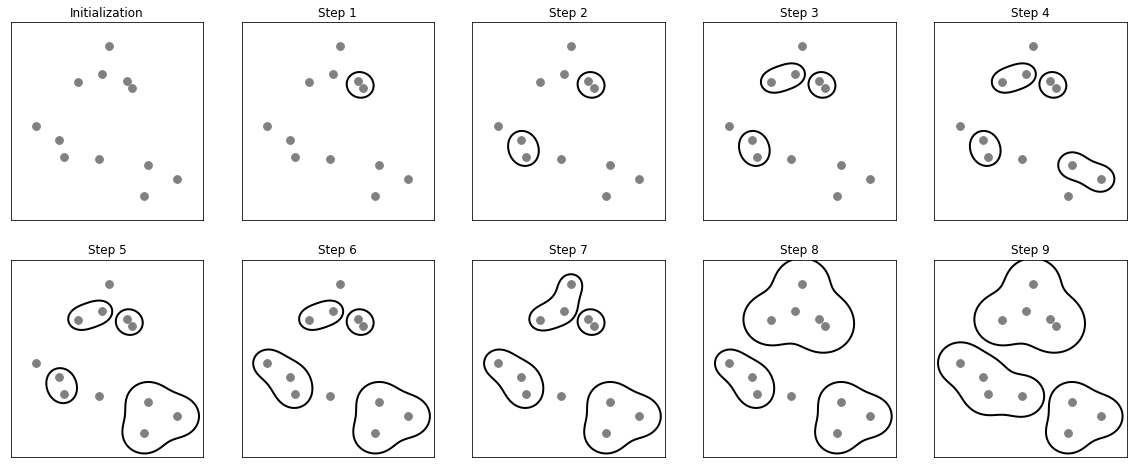

In [4]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'feature 1')

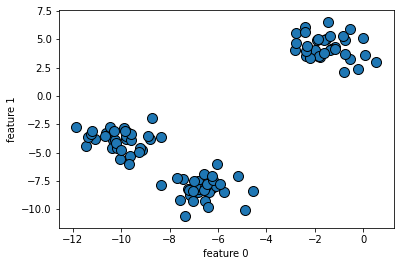

In [3]:
X, y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=1)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)

plt.xlabel('feature 0')
plt.ylabel('feature 1')

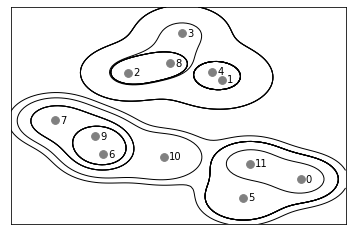

In [5]:
mglearn.plots.plot_agglomerative()

Text(0, 0.5, 'cluster distance')

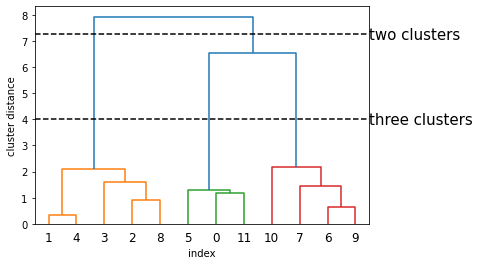

In [7]:
X, y = make_blobs(random_state=0, n_samples=12)

linkage_array = ward(X)

dendrogram(linkage_array)

ax = plt.gca()
bounds = ax.get_xbound()

ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')

ax.text(bounds[1], 7.25, 'two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, 'three clusters', va='center', fontdict={'size': 15})

plt.xlabel('index')
plt.ylabel('cluster distance')

## DBSCAN

In [9]:
X, y = make_blobs(random_state=0, n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)

print(f'clusters affiliation: {clusters}')

clusters affiliation: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


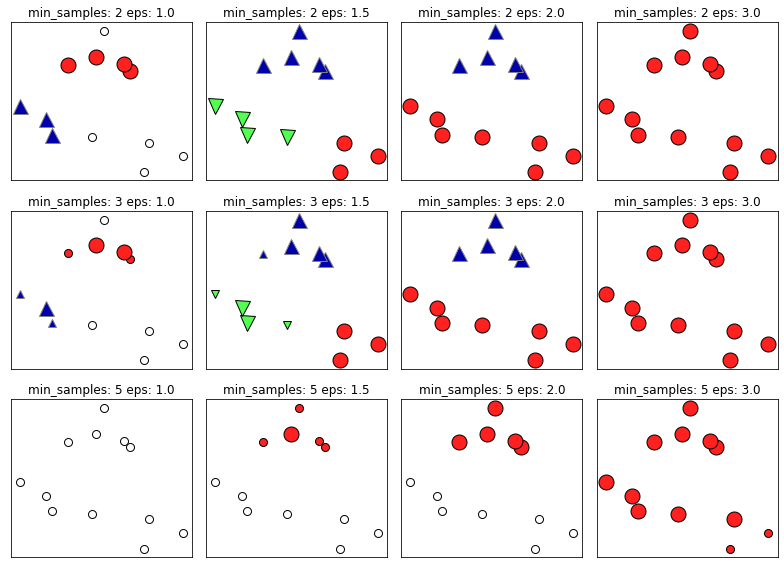

In [10]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'feature 1')

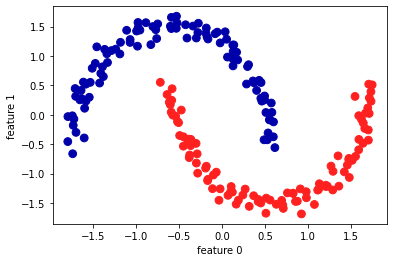

In [11]:
X, y = make_moons(n_samples=200, noise=.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

## Сравнение и оценка качества алгоритмов кластеризации

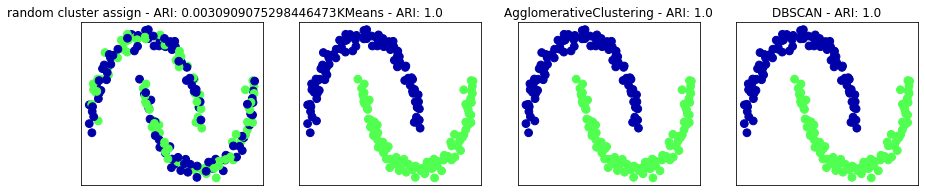

In [17]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})

algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title(f'random cluster assign - ARI: {adjusted_rand_score(y, random_clusters)}')
for ax, algorithm in zip(axes[1:], algorithms):

    ax.scatter(
        X_scaled[:, 0],
        X_scaled[:, 1],
        c=clusters,
        cmap=mglearn.cm3, s=60
    )
    ax.set_title(f'{algorithm.__class__.__name__} - ARI: {adjusted_rand_score(y, clusters)}')

In [19]:
from sklearn.metrics import accuracy_score

clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

print(f'Правильность: {accuracy_score(clusters1, clusters2)}')
print(f'ARI: {adjusted_rand_score(clusters1, clusters2)}')

Правильность: 0.0
ARI: 1.0


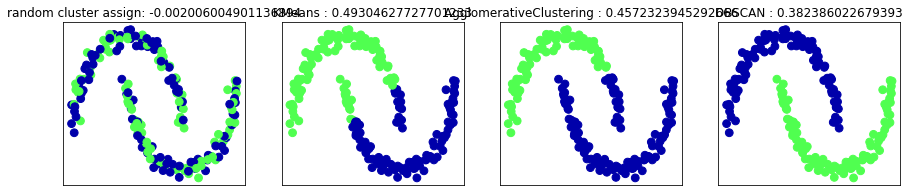

In [21]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

scaler.fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title(f'random cluster assign: {silhouette_score(X_scaled, random_clusters)}')
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)

    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title(f'{algorithm.__class__.__name__} : {silhouette_score(X_scaled, clusters)}')

In [25]:
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)

X_pca = pca.transform(X_people)

In [26]:
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print(f'unique tags: {np.unique(labels)}')

unique tags: [-1]


In [28]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print(f'unique tags: {np.unique(labels)}')

unique tags: [-1]


In [29]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print(f'unique tags: {np.unique(labels)}')

unique tags: [-1  0]


In [30]:
print(f'unique tags per cluster: {np.bincount(labels + 1)}')

unique tags per cluster: [  32 2031]


In [ ]:
noise = X_people[labels == -1]
fig, axes = plt.subplots(
    3, 9,
    subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(12, 4)
)

for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [34]:
for eps in range(1, 15, 2):
    print(f'\n{eps}')
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)

    print(f'clusters: {np.unique(labels)}')
    print(f'clusters sizes: {np.bincount(labels + 1)}')


1
clusters: [-1]
clusters sizes: [2063]

3
clusters: [-1]
clusters sizes: [2063]

5
clusters: [-1]
clusters sizes: [2063]

7
clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]
clusters sizes: [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

9
clusters: [-1  0  1  2]
clusters sizes: [1307  750    3    3]

11
clusters: [-1  0]
clusters sizes: [ 413 1650]

13
clusters: [-1  0]
clusters sizes: [ 120 1943]


In [ ]:
dbscan = DBSCAN(min_samples=3, eps=7)
labels = dbscan.fit_predict(X_pca)

for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(
        1, n_images,
        figsize=(n_images * 1.5, 4),
        subplot_kw={'xticks': (), 'yticks': ()}
    )

for image, label, ax in zip(X_people[mask], y_people[mask], axes):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
    ax.set_title(people.target_names[label].split()[-1])

In [36]:
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)

print(f'k-means clusters sizes: {np.bincount(labels_km)}')

k-means clusters sizes: [280 226 104 268 152 326 203 208 207  89]


In [ ]:
fig, axes = plt.subplots(2, 5, subplot_kw={'xticks': (), 'yticks': ()}, figsize=(12, 4))

for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(
        pca.inverse_transform(center).reshape(image_shape),
        vmin=0,
        vmax=1
    )

In [37]:
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)

print(f'agglomerative clusters sizes: {np.bincount(labels_agg)}')

agglomerative clusters sizes: [169 660 144 329 217  85  18 261  31 149]


In [38]:
print(f'ARI: {adjusted_rand_score(labels_agg, labels_km)}')

ARI: 0.10199363633233553


Text(0, 0.5, 'cluster distance')

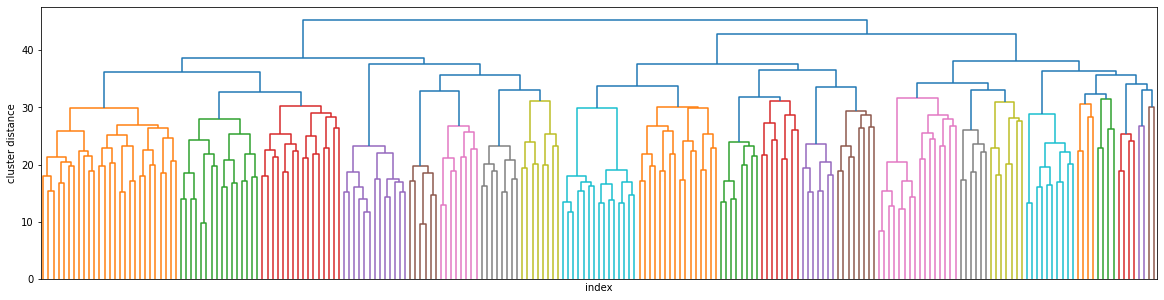

In [39]:
linkage_array = ward(X_pca)

plt.figure(figsize=(20, 5))
dendrogram(linkage_array, p=7, truncate_mode='level', no_labels=True)
plt.xlabel('index')

plt.ylabel('cluster distance')

In [ ]:
n_clusters = 10
for cluster in range(n_clusters):
    mask = labels_agg == cluster
    fig, axes = plt.subplots(
        1, 10,
        subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(15, 8)
    )
    
    axes[0].set_ylabel(np.sum(mask))

    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)

print(f'agglomerative clusters sizes: {np.bincount(labels_agg)}')

n_clusters = 40

for cluster in [10, 13, 19, 22, 36]:
    mask = labels_agg == cluster
    fig, axes = plt.subplots(
        1, 15,
        subplot_kw={'xticks': (), 'yticks': ()},
        figsize=(15, 8)
    )
    
    cluster_size = np.sum(mask)
    
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))

    for image, label, asdf, ax in zip(X_people[mask], y_people[mask], labels_agg[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1], fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)